# STEP 1 IMPORT LIBRARIES

In [1]:
import sys
import pandas as pd
import numpy as np
import statsmodels.api as sm # using statsmodel to run LR
from sklearn.linear_model import LinearRegression # using sklearn to run LR
from math import exp, log

# STEP 2 READ DATA FROM SOURCE

In [2]:
Sarah_data = pd.read_csv('01 CSV data -- Sarah Gets a Diamond.csv', sep = ',')
Sarah_data[0:10] # Display first 10 rows of data (in Python numbering starts with 0, hence these are rows 0 through 9)

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1,1.10,Ideal,H,SI1,VG,EX,GIA,5169.0
1,2,0.83,Ideal,H,VS1,ID,ID,AGSL,3470.0
2,3,0.85,Ideal,H,SI1,EX,EX,GIA,3183.0
3,4,0.91,Ideal,E,SI1,VG,VG,GIA,4370.0
4,5,0.83,Ideal,G,SI1,EX,EX,GIA,3171.0
5,6,1.53,Ideal,E,SI1,ID,ID,AGSL,12791.0
6,7,1.00,Very Good,D,SI1,VG,G,GIA,5747.0
7,8,1.50,Fair,F,SI1,VG,VG,GIA,10450.0
8,9,2.11,Ideal,H,SI1,VG,VG,GIA,18609.0
9,10,1.05,Very Good,E,VS1,VG,G,GIA,7666.0


# STEP 3 SPLIT DATA TRAINING AND PREDICITON DATA SET SHOULD BE SAPARATED

In [3]:
Sarah_data_training = Sarah_data[:6000] # Dataframe Sarah_data_training contains the data about the first 6000 diamonds
Sarah_data_prediction = Sarah_data[6000:] # Dataframe Sarah_data_prediction contains the data about the rest

# STEP 4 DUMMY VARIABLES

In [4]:
# Step 2.2: Creating dummy variables (in machine learning this is called "one-hot encoding")
Sarah_data_training = pd.get_dummies(data=Sarah_data_training, columns = ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report'], drop_first=True, dtype=int)
# drop first category value for each category to remove multicollinearity between each variable
Sarah_data_training[0:10] # Display first 10 rows of data (rows 0 through 9)

,ID,Carat Weight,Price,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1,1.10,5169.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2,0.83,3470.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3,0.85,3183.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,0.91,4370.0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
4,5,0.83,3171.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,6,1.53,12791.0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
6,7,1.00,5747.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
7,8,1.50,10450.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
8,9,2.11,18609.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
9,10,1.05,7666.0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,1,0,0,1


# STEP 5 CREATE SAPARATE DATAFRAME Y_train DEPENDANT VARIABLE AND X_train INDEPENDANT VARIABLE 

In [5]:
Y_train = Sarah_data_training[(['Price'])]
X_train = Sarah_data_training.drop(['ID','Price'], axis=1)

# BASELINE MULTIPLE REGRESSION MODEL

In [6]:
# Regression on entire training set 6000 rows
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train) # In this package, by default, the regression will have no intercept, hence we need to manually add it to the X matrix, and call the result X_sm
lm = sm.OLS(Y_train, X_train_sm.astype(float)).fit() # Fit/"train"/"learn" a linear regression ("ordinary least squares", OLS) with vector Y as dependent and matrix X_sm as independent
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1645.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:09:00   Log-Likelihood:                -57908.
No. Observations:                6000   AIC:                         1.159e+05
Df Residuals:                    5976   BIC:                         1.160e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.642e+04   1954.801     13.517      0.000    2.26e+04    3.03e+04
Carat Weight         1.839e+04    105.110    175.005      0.000    1.82e+04    1.86e+04
Cut_Good             -322.5957    362.520     -0.890      0.374   -1033.265     388.074
Cut_Ideal             274.6927    355.384      0.773      0.440    -421.988     971.373
Cut_Signature-Ideal  1677.1908    439.716      3.814      0.000     815.189    2539.193
Cut_Very Good         -35.6357    345.517     -0.103      0.918    -712.973     641.702
Color_E             -2327.3317    200.473    -11.609      0.000   -2720.331   -1934.332
Color_F             -3078.2407    189.816    -16.217      0.000   -3450.349   -2706.132
Color_G             -4799.5517    178.263    -26.924      0.000   -5149.012   -4450.092
Color_H             -6361.2739    188.072    -33.824      0.000   -6729.963   -5992.584
Color_I             -8039.9918    192.814    -41.698      0.000   -8417.977   -7662.006
Clarity_IF          -2.709e+04   1912.086    -14.170      0.000   -3.08e+04   -2.33e+04
Clarity_SI1          -3.69e+04   1898.452    -19.436      0.000   -4.06e+04   -3.32e+04
Clarity_VS1         -3.397e+04   1899.196    -17.887      0.000   -3.77e+04   -3.02e+04
Clarity_VS2         -3.531e+04   1898.911    -18.596      0.000    -3.9e+04   -3.16e+04
Clarity_VVS1        -3.058e+04   1909.252    -16.014      0.000   -3.43e+04   -2.68e+04
Clarity_VVS2        -3.243e+04   1901.916    -17.053      0.000   -3.62e+04   -2.87e+04
Polish_G                1.4906    201.753      0.007      0.994    -394.018     396.999
Polish_ID            -584.7362    744.971     -0.785      0.433   -2045.148     875.676
Polish_VG            -156.7413    126.621     -1.238      0.216    -404.964      91.482
Symmetry_G           -430.4773    188.917     -2.279      0.023    -800.822     -60.132
Symmetry_ID           148.1049    772.420      0.192      0.848   -1366.118    1662.328
Symmetry_VG          -291.3244    133.555     -2.181      0.029    -553.141     -29.508
Report_GIA            184.3296    347.567      0.530      0.596    -497.027     865.687
==============================================================================
Omnibus:                     4389.321   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           149885.754
Skew:                           3.118   Prob(JB):                         0.00
Kurtosis:                      26.678   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# CROSS VALIDATION ON TRAINING DATA SET

In [7]:
# test train split on training 6000 dataset
from sklearn.model_selection import train_test_split
# Splitting the training dataset into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
# Fit the linear regression model
lm = LinearRegression().fit(x_train, y_train)
# Print the model intercept
print("Intercept = ", lm.intercept_)
# Print the model coefficients
print("Model coefficients = ", lm.coef_)
# Print the R^2 score for the training set
print("R^2 =", lm.score(x_train, y_train))
# Predict on the test set
Y_pred = lm.predict(x_test)
# Print the first 4 predictions
Y_pred[0:4]

Intercept =  [26635.42028572]
Model coefficients =  [[ 1.83132463e+04 -3.85626928e+02  1.75741743e+02  1.52618372e+03
  -1.09173274e+02 -2.01918911e+03 -2.75882829e+03 -4.55659559e+03
  -6.09255798e+03 -7.87259885e+03 -2.79724857e+04 -3.72137572e+04
  -3.42447426e+04 -3.56239691e+04 -3.09326894e+04 -3.26854347e+04
  -2.26625583e+01 -7.86975272e+02 -1.87125275e+02 -3.99004764e+02
   3.44341810e+02 -3.24763697e+02  2.58304900e+02]]
R^2 = 0.8677546171602643


array([[13963.10525417],
       [18118.72021166],
       [14184.05420923],
       [  923.11170106]])

In [9]:
percent_errors = np.abs((y_test - Y_pred) / y_test) *100
percent_errors[0:4]
print("Base line Linear Model MAPE = ", np.mean(percent_errors), "%")

Base line Linear Model MAPE =  27.98432467278652 %


# RETRAIN FULL TRAINING DATA SET AFTER CHECKING MAPE SCORE ON CROSS VALIDATION ON TRAINING DATA SET. NEED TO RETRAIN TRAINING DATA TO PREDICT y DEPENDENT VARIABLE OR PRICE ON UNSEEN DATA ROWS WHICH ARE >=6000

In [10]:
# Check the number of rows in X_train
print("Number of rows in X_train:", X_train.shape[0])

# Check the number of rows in Y_train
print("Number of rows in Y_train:", Y_train.shape[0])


Number of rows in X_train: 6000
Number of rows in Y_train: 6000


In [11]:
# retrain 6000 rows for prediction on data set > 6000 we splitted above at Step 4
lm = LinearRegression().fit(X_train, Y_train)
print("Intercept = ", lm.intercept_)
# Print the model coefficients
print("Model coefficients = ", lm.coef_)
# Print the R^2 score for the training set
print("R^2 =", lm.score(X_train, Y_train))

Intercept =  [26423.89481315]
Model coefficients =  [[ 1.83948330e+04 -3.22595688e+02  2.74692681e+02  1.67719076e+03
  -3.56356533e+01 -2.32733175e+03 -3.07824070e+03 -4.79955175e+03
  -6.36127388e+03 -8.03999181e+03 -2.70937885e+04 -3.68981919e+04
  -3.39709797e+04 -3.53125448e+04 -3.05753935e+04 -3.24342346e+04
   1.49058530e+00 -5.84736225e+02 -1.56741252e+02 -4.30477274e+02
   1.48104862e+02 -2.91324371e+02  1.84329597e+02]]
R^2 = 0.8635908847404312


# PREDICTION ON UNSEEN DATA ROWS > 6000

In [12]:
Sarah_data_prediction

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
6000,6001,2.18,Very Good,I,SI1,EX,EX,GIA,NaN
6001,6002,2.32,Ideal,E,VVS2,VG,EX,GIA,NaN
6002,6003,0.77,Good,F,VS1,VG,G,GIA,NaN
6003,6004,2.01,Very Good,G,VS2,EX,EX,GIA,NaN
6004,6005,1.39,Very Good,E,VVS2,VG,EX,GIA,NaN
...,...,...,...,...,...,...,...,...,...
9137,9138,0.96,Ideal,F,SI1,EX,EX,GIA,NaN
9138,9139,1.02,Very Good,E,VVS1,EX,G,GIA,NaN
9139,9140,1.51,Good,I,VS1,G,G,GIA,NaN
9140,9141,1.24,Ideal,H,VS2,VG,VG,GIA,NaN


In [13]:
#Sarah_data_prediction = Sarah_data[6000:] Create seperate data frame for prediciton data we splitted above at step 4
Y_prediction_data = Sarah_data_prediction[(['Price'])]
X_prediction_data = Sarah_data_prediction.drop(['ID','Price'], axis=1)

In [14]:
cols = X_train.columns.tolist()# Checking the name of all column in train data set

In [15]:
print(cols)

['Carat Weight', 'Cut_Good', 'Cut_Ideal', 'Cut_Signature-Ideal', 'Cut_Very Good', 'Color_E', 'Color_F', 'Color_G', 'Color_H', 'Color_I', 'Clarity_IF', 'Clarity_SI1', 'Clarity_VS1', 'Clarity_VS2', 'Clarity_VVS1', 'Clarity_VVS2', 'Polish_G', 'Polish_ID', 'Polish_VG', 'Symmetry_G', 'Symmetry_ID', 'Symmetry_VG', 'Report_GIA']


In [16]:
X_prediction_data = pd.get_dummies(data=X_prediction_data, columns = ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report'], drop_first=True, dtype=int)

In [17]:
X_prediction_data = X_prediction_data.reindex(columns=cols, fill_value=0)

In [18]:
X_prediction_data

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
6000,2.18,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6001,2.32,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6002,0.77,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
6003,2.01,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
6004,1.39,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,0.96,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9138,1.02,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
9139,1.51,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
9140,1.24,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,1


In [19]:
# Predict on the unseen data set
Y_pred_unseen = lm.predict(X_prediction_data)
# Print the first 4 predictions
Y_pred_unseen[0:4]

array([[21735.14087324],
       [34640.62193515],
       [ 2813.21116046],
       [23434.10650257]])

# LOG LEVEL REGRESSION

In [20]:
from math import exp, log
Y_train.loc[:, 'Price'] = Y_train['Price'].transform(log)
Y_train[0:4]

,Price
0,8.550435
1,8.151910
2,8.065579
3,8.382518


In [21]:
X_train

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1.10,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,0.83,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,0.85,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.91,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,0.83,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5996,1.00,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
5997,1.02,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5998,1.27,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, Y_train) # Fit/"train"/"learn" a linear regression with vector Y as dependent and matrix X as independent

print("Intercept = ",lm.intercept_) # Print the resultant/estimated/"learned" model intercept

print("Model coefficients = ", lm.coef_) # Print the resultant/estimated/"learned" model coefficients (in order of variables in X)

print("R^2 =",lm.score(X_train,Y_train))

Intercept =  [7.99559319]
Model coefficients =  [[ 1.36666538  0.06271325  0.11882711  0.27339295  0.08757702 -0.09057753
  -0.1117054  -0.19973354 -0.33261547 -0.46579858 -0.27455115 -0.85579713
  -0.6048219  -0.69068743 -0.39604962 -0.46482291 -0.04252949  0.08004346
  -0.02586428 -0.00994708  0.00377883 -0.01301412  0.09225601]]
R^2 = 0.9604130594361369


# LOG LEVEL REGRESSION CROSS VALIDATION

In [23]:
train_cv = X_train.iloc[:5000] # x_train
test_cv = X_train.iloc[5000:6000] # x_test

In [24]:
y_train_cv = Y_train.iloc[:5000] # y_train
y_test_cv = Y_train.iloc[5000:6000] # y_test

In [25]:
lm = LinearRegression().fit(train_cv, y_train_cv)
Y_pred_log = lm.predict(test_cv)
Y_pred_log[0:4]

array([[8.91115613],
       [8.78343964],
       [9.33894569],
       [8.52231986]])

In [26]:
Y_pred_original = np.exp(Y_pred_log) # Coverting it to original form 
Y_pred_original[0:4]

array([[ 7414.22798488],
       [ 6525.28325689],
       [11372.41185076],
       [ 5025.69914199]])

In [27]:
# converting y_test_cv  or y_test to original form to check MAPE score 
Y_test_original = np.exp(y_test_cv)

In [28]:
# Calculate percentage errors
percent_errors = np.abs((Y_test_original - Y_pred_original) / Y_test_original) * 100

# Display the first 4 percentage errors
print(percent_errors[0:4])

# Calculate and display the MAPE
print("Log-Level Model MAPE = ", np.mean(percent_errors), "%")

          Price
5000   9.039038
5001   2.665823
5002  16.397766
5003  12.532448
Log-Level Model MAPE =  10.704425212802136 %


# PREDICTION ON UNSEEN DATA ROWS > 6000

In [23]:
# prediction on full 6000 trained rows as per above 
X_prediction_data # Already created dummy variables above and solve mismatch column problem with training dataset above 

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
6000,2.18,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6001,2.32,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6002,0.77,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
6003,2.01,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
6004,1.39,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,0.96,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9138,1.02,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
9139,1.51,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
9140,1.24,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,1


In [24]:
# Predict on the unseen data set
Y_pred_unseen_log = lm.predict(X_prediction_data)
# Print the first 4 predictions
Y_pred_unseen_log[0:4]

array([[ 9.83316105],
       [10.79607527],
       [ 8.45055612],
       [10.03200267]])

In [25]:
Y_pred_unseen_log_original = np.exp(Y_pred_unseen_log) # Coverting it to original form 
Y_pred_unseen_log_original[0:4]

array([[18641.78871988],
       [48828.78489696],
       [ 4677.6733785 ],
       [22742.77227182]])

In [26]:
import pandas as pd

prediciton = pd.DataFrame(Y_pred_unseen_log_original, columns=['Predicted_Price'])

# Export the DataFrame to a CSV file
prediciton.to_csv("Predicted_Diamond_Prices_LOG_LEVEL_REGRESSION.csv", sep=',', index=False)


# LOG LOG MODEL- REPEAT STEPS SAME AS ABOVE

In [29]:
from math import exp, log
Sarah_data_training['Price'] = Sarah_data_training['Price'].transform(log)
Sarah_data_training['Carat Weight'] = Sarah_data_training['Carat Weight'].transform(log)

In [30]:
Sarah_data_training

,ID,Carat Weight,Price,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1,0.095310,8.550435,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2,-0.186330,8.151910,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3,-0.162519,8.065579,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,-0.094311,8.382518,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
4,5,-0.186330,8.061802,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5996,0.029559,8.740337,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5996,5997,0.000000,8.580731,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
5997,5998,0.019803,8.725345,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5998,5999,0.239017,9.324205,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [31]:
Y_train_log_log = Sarah_data_training[['Price']]
Y_train_log_log[0:4]

,Price
0,8.550435
1,8.151910
2,8.065579
3,8.382518


In [32]:
X_train_log_log = Sarah_data_training.drop(['ID', 'Price'], axis=1)
X_train_log_log[0:4]

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,0.095310,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,-0.186330,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,-0.162519,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.094311,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [33]:
import statsmodels.api as sm
X_train_sm_log_log = sm.add_constant(X_train_log_log)


lm = sm.OLS(Y_train_log_log, X_train_sm_log_log.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.260e+04
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:11:00   Log-Likelihood:                 5244.9
No. Observations:                6000   AIC:                        -1.044e+04
Df Residuals:                    5976   BIC:                        -1.028e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.4461      0.052    180.732      0.000       9.344       9.549
Carat Weight            1.9874      0.004    490.292      0.000       1.979       1.995
Cut_Good                0.0502      0.010      5.156      0.000       0.031       0.069
Cut_Ideal               0.1061      0.010     11.125      0.000       0.087       0.125
Cut_Signature-Ideal     0.2518      0.012     21.332      0.000       0.229       0.275
Cut_Very Good           0.0782      0.009      8.428      0.000       0.060       0.096
Color_E                -0.0858      0.005    -15.951      0.000      -0.096      -0.075
Color_F                -0.1232      0.005    -24.181      0.000      -0.133      -0.113
Color_G                -0.2192      0.005    -45.787      0.000      -0.229      -0.210
Color_H                -0.3495      0.005    -69.199      0.000      -0.359      -0.340
Color_I                -0.4944      0.005    -95.443      0.000      -0.505      -0.484
Clarity_IF             -0.3002      0.051     -5.849      0.000      -0.401      -0.200
Clarity_SI1            -0.8636      0.051    -16.949      0.000      -0.964      -0.764
Clarity_VS1            -0.6221      0.051    -12.204      0.000      -0.722      -0.522
Clarity_VS2            -0.7016      0.051    -13.765      0.000      -0.801      -0.602
Clarity_VVS1           -0.4206      0.051     -8.208      0.000      -0.521      -0.320
Clarity_VVS2           -0.4932      0.051     -9.663      0.000      -0.593      -0.393
Polish_G               -0.0368      0.005     -6.796      0.000      -0.047      -0.026
Polish_ID               0.0239      0.020      1.196      0.232      -0.015       0.063
Polish_VG              -0.0222      0.003     -6.529      0.000      -0.029      -0.016
Symmetry_G             -0.0215      0.005     -4.238      0.000      -0.031      -0.012
Symmetry_ID          7.571e-05      0.021      0.004      0.997      -0.041       0.041
Symmetry_VG            -0.0201      0.004     -5.608      0.000      -0.027      -0.013
Report_GIA              0.0493      0.009      5.284      0.000       0.031       0.068
==============================================================================
Omnibus:                      262.841   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              683.775
Skew:                           0.220   Prob(JB):                    3.31e-149
Kurtosis:                       4.594   Cond. No.                         180.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#repeating the same with sklearn:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train_log_log , Y_train_log_log) 
print("Intercept = ",lm.intercept_)
print("Model coefficients = ", lm.coef_) 
print("R^2 =",lm.score(X_train_log_log , Y_train_log_log))

Intercept =  [9.44611099]
Model coefficients =  [[ 1.98738805e+00  5.01803703e-02  1.06133351e-01  2.51799679e-01
   7.81708053e-02 -8.58346642e-02 -1.23215948e-01 -2.19169040e-01
  -3.49474631e-01 -4.94358267e-01 -3.00187770e-01 -8.63635300e-01
  -6.22106232e-01 -7.01559703e-01 -4.20633848e-01 -4.93243211e-01
  -3.68065460e-02  2.39145883e-02 -2.21901183e-02 -2.14927133e-02
   7.57136732e-05 -2.01005934e-02  4.92991686e-02]]
R^2 = 0.979801588042999


# CROSS VALIDATION 

In [35]:
Y_train_cv = Y_train_log_log.iloc[:5000]
Y_test_cv = Y_train_log_log.iloc[5000:6000]

X_train_cv = X_train_log_log.iloc[:5000]
X_test_cv = X_train_log_log.iloc[5000:6000]

In [36]:
lm = LinearRegression().fit(X_train_cv, Y_train_cv)
Y_pred_log_log = lm.predict(X_test_cv)
Y_pred_log_log[0:4]

array([[8.88942191],
       [8.80908333],
       [9.48360422],
       [8.48165953]])

In [37]:
from math import exp, log
Y_pred_original_log_log = np.exp(Y_pred_log_log) # converting prediction to original form 
print(Y_pred_original_log_log[0:4])

[[ 7254.82401655]
 [ 6694.77955041]
 [13142.46955545]
 [ 4825.4512542 ]]


In [38]:
Y_test_original_log_log = np.exp(Y_test_cv) # converting Y_test to original form 
print(Y_test_original_log_log[0:4])

        Price
5000   8151.0
5001   6704.0
5002  13603.0
5003   4466.0


In [39]:
percent_errors = np.abs((Y_test_original_log_log - Y_pred_original_log_log) / Y_test_original_log_log) *100

percent_errors[0:4]

print("Log-Log Model MAPE = ", np.mean(percent_errors), "%")

Log-Log Model MAPE =  7.812152156249907 %


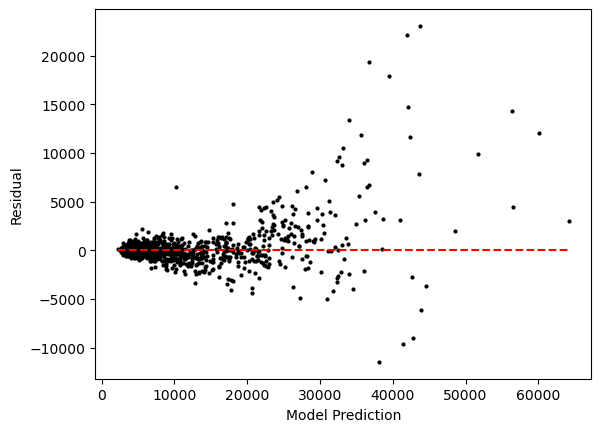

In [40]:
import matplotlib.pyplot as plt

residuals = Y_test_original_log_log - Y_pred_original_log_log

plt.scatter(Y_pred_original_log_log,residuals,s=4,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(Y_pred_original_log_log),max(Y_pred_original_log_log),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

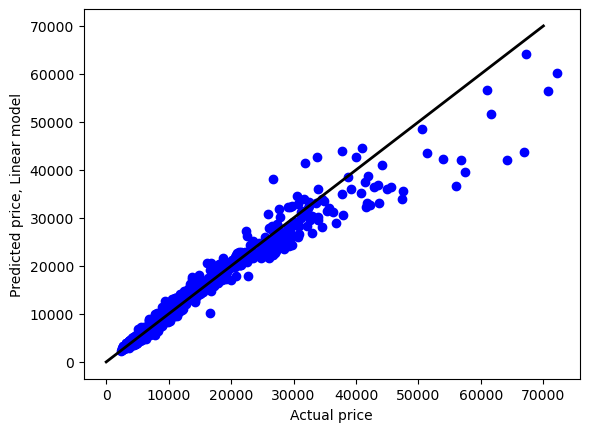

In [41]:
#Log Log model

plt.scatter(Y_test_original_log_log, Y_pred_original_log_log, color='blue') # actual vs predicted prices for the linear model
plt.ylabel('Predicted price, Linear model') # vertical axis title
plt.xlabel('Actual price') # horizontal axis title
plt.plot([0, 70000], [0, 70000], color='black', lw=2) # 45-degree line (at which error = 0)

plt.show

# INTERECTIONS WITH LOG LOG

In [42]:
Sarah_data_training


,ID,Carat Weight,Price,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1,0.095310,8.550435,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2,-0.186330,8.151910,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3,-0.162519,8.065579,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,-0.094311,8.382518,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
4,5,-0.186330,8.061802,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5996,0.029559,8.740337,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5996,5997,0.000000,8.580731,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
5997,5998,0.019803,8.725345,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5998,5999,0.239017,9.324205,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [43]:
Sarah_data_training_cols = Sarah_data_training.columns.tolist()

In [44]:
print(Sarah_data_training_cols)

['ID', 'Carat Weight', 'Price', 'Cut_Good', 'Cut_Ideal', 'Cut_Signature-Ideal', 'Cut_Very Good', 'Color_E', 'Color_F', 'Color_G', 'Color_H', 'Color_I', 'Clarity_IF', 'Clarity_SI1', 'Clarity_VS1', 'Clarity_VS2', 'Clarity_VVS1', 'Clarity_VVS2', 'Polish_G', 'Polish_ID', 'Polish_VG', 'Symmetry_G', 'Symmetry_ID', 'Symmetry_VG', 'Report_GIA']


In [45]:
Sarah_data_training['Carat Weight:Color_E'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Color_E']
Sarah_data_training['Carat Weight:Color_F'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Color_F']
Sarah_data_training['Carat Weight:Color_G'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Color_G']
Sarah_data_training['Carat Weight:Color_H'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Color_H']
Sarah_data_training['Carat Weight:Color_I'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Color_I']
Sarah_data_training['Carat Weight:Cut_Good'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Cut_Good']
Sarah_data_training['Carat Weight:Cut_Ideal'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Cut_Ideal']
Sarah_data_training['Carat Weight:Cut_Signature-Ideal'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Cut_Signature-Ideal']
Sarah_data_training['Carat Weight:Cut_Very Good'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Cut_Very Good']
Sarah_data_training['Carat Weight:Clarity_IF'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Clarity_IF']
Sarah_data_training['Carat Weight:Clarity_SI1'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Clarity_SI1']
Sarah_data_training['Carat Weight:Clarity_VS1'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Clarity_VS1']
Sarah_data_training['Carat Weight:Clarity_VS2'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Clarity_VS2']
Sarah_data_training['Carat Weight:Clarity_VVS1'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Clarity_VVS1']
Sarah_data_training['Carat Weight:Clarity_VVS2'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Clarity_VVS2']
Sarah_data_training['Carat Weight:Polish_G'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Polish_G']
Sarah_data_training['Carat Weight:Polish_VG'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Polish_VG']
Sarah_data_training['Carat Weight:Symmetry_G'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Symmetry_G']
Sarah_data_training['Carat Weight:Symmetry_ID'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Symmetry_ID']
Sarah_data_training['Carat Weight:Symmetry_VG'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Symmetry_VG']
Sarah_data_training['Carat Weight:Report_GIA'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Report_GIA']

In [46]:
train = Sarah_data_training.iloc[:5000]
test = Sarah_data_training.iloc[5000:6000]

Y_train = train[(['Price'])]
X_train = train.drop(['ID', 'Price'], axis = 1)

Y_test = np.exp(test[(['Price'])])
X_test = test.drop(['ID', 'Price'], axis = 1)

lm = LinearRegression().fit(X_train, Y_train)

Y_pred_log = np.exp(lm.predict(X_test))

percent_errors = np.abs((Y_test - Y_pred_log) / Y_test) *100

percent_errors[0:4]

print("Log-Log Model with Interactions MAPE = ", np.mean(percent_errors), "%")

Log-Log Model with Interactions MAPE =  7.4607447183807345 %


# Training on full data set for prediction on this model 

In [47]:
Y_train = Sarah_data_training[(['Price'])]
X_train = Sarah_data_training.drop(['ID', 'Price'], axis = 1)

In [48]:
X_train_sm = sm.add_constant(X_train) # In this package, by default, the regression will have no intercept, hence we need to manually add it to the X matrix, and call the result X_sm
lm = sm.OLS(Y_train, X_train_sm.astype(float)).fit() # Fit/"train"/"learn" a linear regression ("ordinary least squares", OLS) with vector Y as dependent and matrix X_sm as independent
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     7370.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:11:13   Log-Likelihood:                 5585.0
No. Observations:                6000   AIC:                        -1.108e+04
Df Residuals:                    5955   BIC:                        -1.078e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                9.4393      0.155     60.743      0.000       9.135       9.744
Carat Weight                         2.0658      0.229      9.005      0.000       1.616       2.515
Cut_Good                             0.0450      0.010      4.720      0.000       0.026       0.064
Cut_Ideal                            0.1093      0.009     11.692      0.000       0.091       0.128
Cut_Signature-Ideal                  0.2516      0.012     20.915      0.000       0.228       0.275
Cut_Very Good                        0.0738      0.009      8.216      0.000       0.056       0.091
Color_E                             -0.0654      0.006    -11.524      0.000      -0.077      -0.054
Color_F                             -0.1043      0.006    -18.698      0.000      -0.115      -0.093
Color_G                             -0.1879      0.005    -35.131      0.000      -0.198      -0.177
Color_H                             -0.2934      0.006    -51.942      0.000      -0.304      -0.282
Color_I                             -0.4269      0.006    -72.140      0.000      -0.439      -0.415
Clarity_IF                          -0.3377      0.155     -2.176      0.030      -0.642      -0.034
Clarity_SI1                         -0.8809      0.155     -5.685      0.000      -1.185      -0.577
Clarity_VS1                         -0.6627      0.155     -4.277      0.000      -0.966      -0.359
Clarity_VS2                         -0.7272      0.155     -4.693      0.000      -1.031      -0.423
Clarity_VVS1                        -0.4617      0.155     -2.977      0.003      -0.766      -0.158
Clarity_VVS2                        -0.5222      0.155     -3.370      0.001      -0.826      -0.218
Polish_G                            -0.0381      0.006     -6.437      0.000      -0.050      -0.027
Polish_ID                            0.0255      0.019      1.341      0.180      -0.012       0.063
Polish_VG                           -0.0244      0.004     -6.347      0.000      -0.032      -0.017
Symmetry_G                          -0.0262      0.006     -4.551      0.000      -0.038      -0.015
Symmetry_ID                          0.0026      0.020      0.127      0.899      -0.037       0.042
Symmetry_VG                         -0.0208      0.004     -5.096      0.000      -0.029      -0.013
Report_GIA                           0.0548      0.010      5.379      0.000       0.035       0.075
Carat Weight:Color_E                -0.1089      0.016     -6.914      0.000      -0.140      -0.078
Carat Weight:Color_F                -0.1117      0.015     -7.547      0.000      -0.141      -0.083
Carat Weight:Color_G                -0.1683      0.014    -12.080      0.000      -0.196      -0.141
Carat Weight:Color_H                -0.2681      0.01

In [49]:
train_1 = Sarah_data_training.iloc[:5000]
test_1 = Sarah_data_training.iloc[5000:6000]

# removed fetures with P value less than 0.05 insignificant features
Y_train_1 = train[(['Price'])]
X_train_1 = train.drop(['ID', 'Price', 'Carat Weight:Symmetry_VG', 'Carat Weight:Symmetry_ID','Carat Weight:Symmetry_G','Carat Weight:Polish_VG','Carat Weight:Polish_G','Carat Weight:Clarity_VVS2','Carat Weight:Clarity_VVS1','Carat Weight:Clarity_VS2','Carat Weight:Clarity_VS1','Carat Weight:Clarity_SI1','Carat Weight:Clarity_IF','Carat Weight:Cut_Very Good','Carat Weight:Cut_Signature-Ideal','Carat Weight:Cut_Ideal','Carat Weight:Cut_Good'], axis = 1)

Y_test_1 = np.exp(test[(['Price'])])
X_test_1 = test.drop(['ID', 'Price', 'Carat Weight:Symmetry_VG', 'Carat Weight:Symmetry_ID','Carat Weight:Symmetry_G','Carat Weight:Polish_VG','Carat Weight:Polish_G','Carat Weight:Clarity_VVS2','Carat Weight:Clarity_VVS1','Carat Weight:Clarity_VS2','Carat Weight:Clarity_VS1','Carat Weight:Clarity_SI1','Carat Weight:Clarity_IF','Carat Weight:Cut_Very Good','Carat Weight:Cut_Signature-Ideal','Carat Weight:Cut_Ideal','Carat Weight:Cut_Good'], axis = 1)


In [50]:
lm = LinearRegression().fit(X_train_1, Y_train_1)

Y_pred_log = np.exp(lm.predict(X_test_1))

percent_errors = np.abs((Y_test_1 - Y_pred_log) / Y_test_1) *100

percent_errors[0:4]

print("Log-Log Model with Interactions MAPE = ", np.mean(percent_errors), "%")

Log-Log Model with Interactions MAPE =  7.50838045709396 %


In [51]:
X_prediction_data # Already created dummy variables above and solve mismatch column problem with training dataset above 

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
6000,2.18,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6001,2.32,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6002,0.77,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
6003,2.01,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
6004,1.39,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,0.96,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9138,1.02,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
9139,1.51,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
9140,1.24,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,1


In [52]:
X_prediction_data['Carat Weight:Color_E'] = X_prediction_data['Carat Weight'] * X_prediction_data['Color_E']
X_prediction_data['Carat Weight:Color_F'] = X_prediction_data['Carat Weight'] * X_prediction_data['Color_F']
X_prediction_data['Carat Weight:Color_G'] = X_prediction_data['Carat Weight'] * X_prediction_data['Color_G']
X_prediction_data['Carat Weight:Color_H'] = X_prediction_data['Carat Weight'] * X_prediction_data['Color_H']
X_prediction_data['Carat Weight:Color_I'] = X_prediction_data['Carat Weight'] * X_prediction_data['Color_I']
X_prediction_data['Carat Weight:Report_GIA'] = X_prediction_data['Carat Weight'] * X_prediction_data['Report_GIA']

In [53]:
X_prediction_data['Carat Weight'] = X_prediction_data['Carat Weight'].transform(log)

In [54]:
X_train = X_train.drop(['Carat Weight:Symmetry_VG', 'Carat Weight:Symmetry_ID','Carat Weight:Symmetry_G','Carat Weight:Polish_VG','Carat Weight:Polish_G','Carat Weight:Clarity_VVS2','Carat Weight:Clarity_VVS1','Carat Weight:Clarity_VS2','Carat Weight:Clarity_VS1','Carat Weight:Clarity_SI1','Carat Weight:Clarity_IF','Carat Weight:Cut_Very Good','Carat Weight:Cut_Signature-Ideal','Carat Weight:Cut_Ideal','Carat Weight:Cut_Good'], axis = 1)

In [55]:
X_train_sm = sm.add_constant(X_train) # In this package, by default, the regression will have no intercept, hence we need to manually add it to the X matrix, and call the result X_sm
lm = sm.OLS(Y_train, X_train_sm.astype(float)).fit() # Fit/"train"/"learn" a linear regression ("ordinary least squares", OLS) with vector Y as dependent and matrix X_sm as independent
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.100e+04
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:11:21   Log-Likelihood:                 5528.1
No. Observations:                6000   AIC:                        -1.100e+04
Df Residuals:                    5970   BIC:                        -1.080e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       9.3390      0.050    185.129      0.000       9.240       9.438
Carat Weight                2.1744      0.016    133.810      0.000       2.143       2.206
Cut_Good                    0.0517      0.009      5.561      0.000       0.033       0.070
Cut_Ideal                   0.1062      0.009     11.665      0.000       0.088       0.124
Cut_Signature-Ideal         0.2500      0.011     22.182      0.000       0.228       0.272
Cut_Very Good               0.0792      0.009      8.942      0.000       0.062       0.097
Color_E                    -0.0654      0.006    -11.443      0.000      -0.077      -0.054
Color_F                    -0.1067      0.006    -19.025      0.000      -0.118      -0.096
Color_G                    -0.1908      0.005    -35.530      0.000      -0.201      -0.180
Color_H                    -0.2950      0.006    -51.877      0.000      -0.306      -0.284
Color_I                    -0.4292      0.006    -72.069      0.000      -0.441      -0.418
Clarity_IF                 -0.2283      0.049     -4.640      0.000      -0.325      -0.132
Clarity_SI1                -0.7805      0.049    -15.953      0.000      -0.876      -0.685
Clarity_VS1                -0.5430      0.049    -11.097      0.000      -0.639      -0.447
Clarity_VS2                -0.6194      0.049    -12.658      0.000      -0.715      -0.523
Clarity_VVS1               -0.3463      0.049     -7.044      0.000      -0.443      -0.250
Clarity_VVS2               -0.4158      0.049     -8.489      0.000      -0.512      -0.320
Polish_G                   -0.0398      0.005     -7.701      0.000      -0.050      -0.030
Polish_ID                   0.0241      0.019      1.261      0.208      -0.013       0.062
Polish_VG                  -0.0228      0.003     -7.024      0.000      -0.029      -0.016
Symmetry_G                 -0.0216      0.005     -4.463      0.000      -0.031      -0.012
Symmetry_ID                -0.0069      0.020     -0.347      0.729      -0.046       0.032
Symmetry_VG                -0.0201      0.003     -5.866      0.000      -0.027      -0.013
Report_GIA                  0.0465      0.009      5.007      0.000       0.028       0.065
Carat Weight:Color_E       -0.1104      0.016     -7.012      0.000      -0.141      -0.080
Carat Weight:Color_F       -0.1092      0.015     -7.392      0.000      -0.138      -0.080
Carat Weight:Color_G       -0.1636      0.014    -11.770      0.000      -0.191      -0.136
Carat Weight:Color_H       -0.2667      0.015    -18.392      0.000      -0.295      -0.238
Carat Weight:Color_I       -0.3000      0.015    -19.907      0.000      -0.330      -0.270
Carat Weight:Report_GIA    -0.0174      0.012     -1.425      0.154      -0.041       0.007
===============================================

In [56]:
X_train = X_train.drop(['Polish_ID','Carat Weight:Report_GIA','Symmetry_ID'], axis = 1)

In [57]:
X_train_sm = sm.add_constant(X_train) # In this package, by default, the regression will have no intercept, hence we need to manually add it to the X matrix, and call the result X_sm
lm = sm.OLS(Y_train, X_train_sm.astype(float)).fit() # Fit/"train"/"learn" a linear regression ("ordinary least squares", OLS) with vector Y as dependent and matrix X_sm as independent
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.226e+04
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:11:24   Log-Likelihood:                 5525.1
No. Observations:                6000   AIC:                        -1.100e+04
Df Residuals:                    5973   BIC:                        -1.082e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.3524      0.050    186.958      0.000       9.254       9.450
Carat Weight             2.1581      0.012    186.371      0.000       2.135       2.181
Cut_Good                 0.0523      0.009      5.628      0.000       0.034       0.070
Cut_Ideal                0.1080      0.009     11.922      0.000       0.090       0.126
Cut_Signature-Ideal      0.2537      0.011     22.956      0.000       0.232       0.275
Cut_Very Good            0.0800      0.009      9.046      0.000       0.063       0.097
Color_E                 -0.0655      0.006    -11.456      0.000      -0.077      -0.054
Color_F                 -0.1072      0.006    -19.129      0.000      -0.118      -0.096
Color_G                 -0.1912      0.005    -35.642      0.000      -0.202      -0.181
Color_H                 -0.2954      0.006    -52.000      0.000      -0.307      -0.284
Color_I                 -0.4297      0.006    -72.247      0.000      -0.441      -0.418
Clarity_IF              -0.2257      0.049     -4.588      0.000      -0.322      -0.129
Clarity_SI1             -0.7781      0.049    -15.903      0.000      -0.874      -0.682
Clarity_VS1             -0.5408      0.049    -11.052      0.000      -0.637      -0.445
Clarity_VS2             -0.6171      0.049    -12.612      0.000      -0.713      -0.521
Clarity_VVS1            -0.3439      0.049     -6.995      0.000      -0.440      -0.247
Clarity_VVS2            -0.4136      0.049     -8.445      0.000      -0.510      -0.318
Polish_G                -0.0398      0.005     -7.688      0.000      -0.050      -0.030
Polish_VG               -0.0229      0.003     -7.053      0.000      -0.029      -0.017
Symmetry_G              -0.0218      0.005     -4.510      0.000      -0.031      -0.012
Symmetry_VG             -0.0203      0.003     -5.918      0.000      -0.027      -0.014
Report_GIA               0.0296      0.004      6.801      0.000       0.021       0.038
Carat Weight:Color_E    -0.1105      0.016     -7.018      0.000      -0.141      -0.080
Carat Weight:Color_F    -0.1081      0.015     -7.318      0.000      -0.137      -0.079
Carat Weight:Color_G    -0.1630      0.014    -11.729      0.000      -0.190      -0.136
Carat Weight:Color_H    -0.2654      0.014    -18.338      0.000      -0.294      -0.237
Carat Weight:Color_I    -0.2983      0.015    -19.877      0.000      -0.328      -0.269
==============================================================================
Omnibus:                      274.028   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              924.529
Skew:                           0.081   Prob(JB):                    1.74e-201
Kurtosis:                       4.916   Cond. No.                         182.
==================

In [58]:
X_prediction_data = X_prediction_data.drop(['Polish_ID','Carat Weight:Report_GIA','Symmetry_ID'], axis = 1)

In [59]:
lm = LinearRegression().fit(X_train, Y_train)

In [60]:
Y_pred_log_Exp = np.exp(lm.predict(X_prediction_data.astype(float)))
Y_pred_log_Exp[0:4]

array([[10781.81027345],
       [38091.33208382],
       [ 3275.43375935],
       [18633.37672351]])

# INTERECTIONS WITH LOG LOG- SECOND TRY

In [66]:
Sarah_data_training['Price'] = Sarah_data_training['Price'].transform(log)
Sarah_data_training['Carat Weight'] = Sarah_data_training['Carat Weight'].transform(log)
Sarah_data_training

,ID,Carat Weight,Price,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1,0.095310,8.550435,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2,-0.186330,8.151910,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,3,-0.162519,8.065579,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,-0.094311,8.382518,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
4,5,-0.186330,8.061802,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5996,0.029559,8.740337,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5996,5997,0.000000,8.580731,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
5997,5998,0.019803,8.725345,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5998,5999,0.239017,9.324205,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [67]:
Sarah_data_training['Carat Weight:Color_E'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Color_E']
Sarah_data_training['Carat Weight:Color_F'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Color_F']
Sarah_data_training['Carat Weight:Color_G'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Color_G']
Sarah_data_training['Carat Weight:Color_H'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Color_H']
Sarah_data_training['Carat Weight:Color_I'] = Sarah_data_training['Carat Weight'] * Sarah_data_training['Color_I']

In [68]:
train = Sarah_data_training.iloc[:5000]
test = Sarah_data_training.iloc[5000:6000]

Y_train = train[(['Price'])]
X_train = train.drop(['ID', 'Price'], axis = 1)

Y_test = np.exp(test[(['Price'])])
X_test = test.drop(['ID', 'Price'], axis = 1)

lm = LinearRegression().fit(X_train, Y_train)

Y_pred_log = np.exp(lm.predict(X_test))

percent_errors = np.abs((Y_test - Y_pred_log) / Y_test) *100

percent_errors[0:4]

print("Log-Log Model with Interactions MAPE = ", np.mean(percent_errors), "%")

Log-Log Model with Interactions MAPE =  7.503236980841637 %


In [69]:
X_prediction_data = pd.get_dummies(data=Sarah_data_prediction, columns = ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report'], drop_first=True, dtype=int)

In [70]:
cols = X_train.columns.tolist()# Checking the name of all column in train data set

In [71]:
X_prediction_data = X_prediction_data.reindex(columns=cols, fill_value=0)

In [72]:
lm_predict = LinearRegression().fit(X_train, Y_train)

In [73]:
X_prediction_data['Carat Weight'] = X_prediction_data['Carat Weight'].transform(log)

In [74]:
Y_pred_log_Exp = np.exp(lm_predict.predict(X_prediction_data))

In [75]:
Y_pred_log_Exp[0:4]

array([[20491.48747442],
       [48931.96559651],
       [ 3566.80861537],
       [25564.00875914]])

In [76]:
Y_train_2 = Sarah_data_training[(['Price'])]
X_train_2 = Sarah_data_training.drop(['ID', 'Price'], axis = 1)

In [77]:
X_train_2

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Carat Weight:Color_E,Carat Weight:Color_F,Carat Weight:Color_G,Carat Weight:Color_H,Carat Weight:Color_I
0,0.095310,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0.000000,0.0,0.000000,0.095310,0.0
1,-0.186330,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,-0.000000,-0.0,-0.000000,-0.186330,-0.0
2,-0.162519,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,-0.000000,-0.0,-0.000000,-0.162519,-0.0
3,-0.094311,0,1,0,0,1,0,0,0,0,...,1,0,0,1,1,-0.094311,-0.0,-0.000000,-0.000000,-0.0
4,-0.186330,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,-0.000000,-0.0,-0.186330,-0.000000,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.029559,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0.000000,0.0,0.000000,0.000000,0.0
5996,0.000000,0,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0.000000,0.0,0.000000,0.000000,0.0
5997,0.019803,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0.000000,0.0,0.000000,0.000000,0.0
5998,0.239017,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0.000000,0.0,0.239017,0.000000,0.0


In [78]:
lm_predict = LinearRegression().fit(X_train_2, Y_train_2)
Y_pred_log_Exp = np.exp(lm_predict.predict(X_prediction_data))
Y_pred_log_Exp[0:4]

array([[20667.26615269],
       [49190.62955783],
       [ 3562.67130596],
       [25863.69261354]])

In [34]:
import pandas as pd

prediciton = pd.DataFrame(Y_pred_log_Exp, columns=['Predicted_Price'])

# Export the DataFrame to a CSV file
prediciton.to_csv("Predicted_Diamond_Prices_LOG_LEVEL_REGRESSION_interesction.csv", sep=',', index=False)

# RANDOM FOREST, DECISION TRESS AND CATBOOST

In [9]:
# Step 2.2: Creating dummy variables (in machine learning this is called "one-hot encoding")
Sarah_data_prediction = pd.get_dummies(data=Sarah_data_prediction, columns = ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report'], drop_first=True, dtype=int)
# drop first category value for each category to remove multicollinearity between each variable
Sarah_data_prediction[0:10] # Display first 10 rows of data (rows 0 through 9)

,ID,Carat Weight,Price,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
6000,6001,2.18,NaN,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6001,6002,2.32,NaN,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
6002,6003,0.77,NaN,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
6003,6004,2.01,NaN,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
6004,6005,1.39,NaN,0,0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
6005,6006,1.22,NaN,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6006,6007,1.01,NaN,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,1
6007,6008,1.50,NaN,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
6008,6009,0.90,NaN,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6009,6010,2.11,NaN,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Split Sarah_data_training
train = Sarah_data_training.iloc[:5000]
test = Sarah_data_training.iloc[5000:6000]

Y_train = train[['Price']]
X_train = train.drop(['ID', 'Price'], axis=1)

Y_test = test[['Price']]
X_test = test.drop(['ID', 'Price'], axis=1)


# Initialize models
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
gbm_model = GradientBoostingRegressor()
xgb_model = xgb.XGBRegressor()
lgb_model = lgb.LGBMRegressor()
cb_model = CatBoostRegressor(verbose=0)

# Train models
dt_model.fit(X_train, Y_train)
rf_model.fit(X_train, Y_train)
gbm_model.fit(X_train, Y_train)
xgb_model.fit(X_train, Y_train)
lgb_model.fit(X_train, Y_train)
cb_model.fit(X_train, Y_train)

# Predict on X_test
Y_pred_dt = dt_model.predict(X_test)
Y_pred_rf = rf_model.predict(X_test)
Y_pred_gbm = gbm_model.predict(X_test)
Y_pred_xgb = xgb_model.predict(X_test)
Y_pred_lgb = lgb_model.predict(X_test)
Y_pred_cb = cb_model.predict(X_test)

# Calculate MAPE for each model
mape_dt = mean_absolute_percentage_error(Y_test, Y_pred_dt) * 100
mape_rf = mean_absolute_percentage_error(Y_test, Y_pred_rf) * 100
mape_gbm = mean_absolute_percentage_error(Y_test, Y_pred_gbm) * 100
mape_xgb = mean_absolute_percentage_error(Y_test, Y_pred_xgb) * 100
mape_lgb = mean_absolute_percentage_error(Y_test, Y_pred_lgb) * 100
mape_cb = mean_absolute_percentage_error(Y_test, Y_pred_cb) * 100

# Print MAPE values as percentages
print(f"MAPE for Decision Tree: {mape_dt:.2f}%")
print(f"MAPE for Random Forest: {mape_rf:.2f}%")
print(f"MAPE for Gradient Boosting: {mape_gbm:.2f}%")
print(f"MAPE for XGBoost: {mape_xgb:.2f}%")
print(f"MAPE for LightGBM: {mape_lgb:.2f}%")
print(f"MAPE for CatBoost: {mape_cb:.2f}%")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 23
[LightGBM] [Info] Start training from score 11720.907200
MAPE for Decision Tree: 7.24%
MAPE for Random Forest: 5.82%
MAPE for Gradient Boosting: 7.95%
MAPE for XGBoost: 5.28%
MAPE for LightGBM: 5.73%
MAPE for CatBoost: 5.13%


In [10]:
Sarah_data_prediction = Sarah_data_prediction.drop(['ID', 'Price'], axis=1)

In [14]:
cols = X_train.columns.tolist()

In [15]:
Sarah_data_prediction = Sarah_data_prediction.reindex(columns=cols, fill_value=0)

In [16]:
Y_pred_log_RF = rf_model.predict(Sarah_data_prediction)
Y_pred_log_RF[0:4]

array([16815.73333333, 50759.14      ,  3179.285     , 25617.327     ])

In [18]:
prediciton = pd.DataFrame(Y_pred_log_RF, columns=['Price'])

# Export the DataFrame to a CSV file
prediciton.to_csv("Predicted_Diamond_Prices_RF.csv", sep=',', index=False)

In [19]:
Sarah_data_training['Price'] = Sarah_data_training['Price'].transform(log)
Sarah_data_training['Carat Weight'] = Sarah_data_training['Carat Weight'].transform(log)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Split Sarah_data_training
train = Sarah_data_training.iloc[:5000]
test = Sarah_data_training.iloc[5000:6000]

Y_train = train[['Price']]
X_train = train.drop(['ID', 'Price'], axis=1)

Y_test = test[['Price']]
X_test = test.drop(['ID', 'Price'], axis=1)


# Initialize models
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
gbm_model = GradientBoostingRegressor()
xgb_model = xgb.XGBRegressor()
lgb_model = lgb.LGBMRegressor()
cb_model = CatBoostRegressor(verbose=0)

# Train models
dt_model.fit(X_train, Y_train)
rf_model.fit(X_train, Y_train)
gbm_model.fit(X_train, Y_train)
xgb_model.fit(X_train, Y_train)
lgb_model.fit(X_train, Y_train)
cb_model.fit(X_train, Y_train)

# Predict on X_test
Y_pred_dt = dt_model.predict(X_test)
Y_pred_rf = rf_model.predict(X_test)
Y_pred_gbm = gbm_model.predict(X_test)
Y_pred_xgb = xgb_model.predict(X_test)
Y_pred_lgb = lgb_model.predict(X_test)
Y_pred_cb = cb_model.predict(X_test)

# Calculate MAPE for each model
mape_dt = mean_absolute_percentage_error(Y_test, Y_pred_dt) * 100
mape_rf = mean_absolute_percentage_error(Y_test, Y_pred_rf) * 100
mape_gbm = mean_absolute_percentage_error(Y_test, Y_pred_gbm) * 100
mape_xgb = mean_absolute_percentage_error(Y_test, Y_pred_xgb) * 100
mape_lgb = mean_absolute_percentage_error(Y_test, Y_pred_lgb) * 100
mape_cb = mean_absolute_percentage_error(Y_test, Y_pred_cb) * 100

# Print MAPE values as percentages
print(f"MAPE for Decision Tree: {mape_dt:.2f}%")
print(f"MAPE for Random Forest: {mape_rf:.2f}%")
print(f"MAPE for Gradient Boosting: {mape_gbm:.2f}%")
print(f"MAPE for XGBoost: {mape_xgb:.2f}%")
print(f"MAPE for LightGBM: {mape_lgb:.2f}%")
print(f"MAPE for CatBoost: {mape_cb:.2f}%")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 23
[LightGBM] [Info] Start training from score 9.095917
MAPE for Decision Tree: 0.77%
MAPE for Random Forest: 0.62%
MAPE for Gradient Boosting: 0.68%
MAPE for XGBoost: 0.54%
MAPE for LightGBM: 0.54%
MAPE for CatBoost: 0.51%


In [21]:
Sarah_data_prediction['Carat Weight'] = Sarah_data_prediction['Carat Weight'].transform(log)

In [22]:
Y_pred_log_RF = np.exp(rf_model.predict(Sarah_data_prediction))
Y_pred_log_RF[0:4]

array([16732.89096625, 51867.83205206,  3222.13092606, 25569.41643262])

In [23]:
prediciton = pd.DataFrame(Y_pred_log_RF, columns=['Price'])

# Export the DataFrame to a CSV file
prediciton.to_csv("Predicted_Diamond_Prices_RF_log.csv", sep=',', index=False)

In [24]:
Y_pred_log_RF = np.exp(cb_model.predict(Sarah_data_prediction))
Y_pred_log_RF[0:4]

array([16653.5859002 , 48385.25718316,  3220.93856417, 24632.14744027])

In [25]:
prediciton = pd.DataFrame(Y_pred_log_RF, columns=['Price'])

# Export the DataFrame to a CSV file
prediciton.to_csv("Predicted_Diamond_Prices_CB_log.csv", sep=',', index=False)

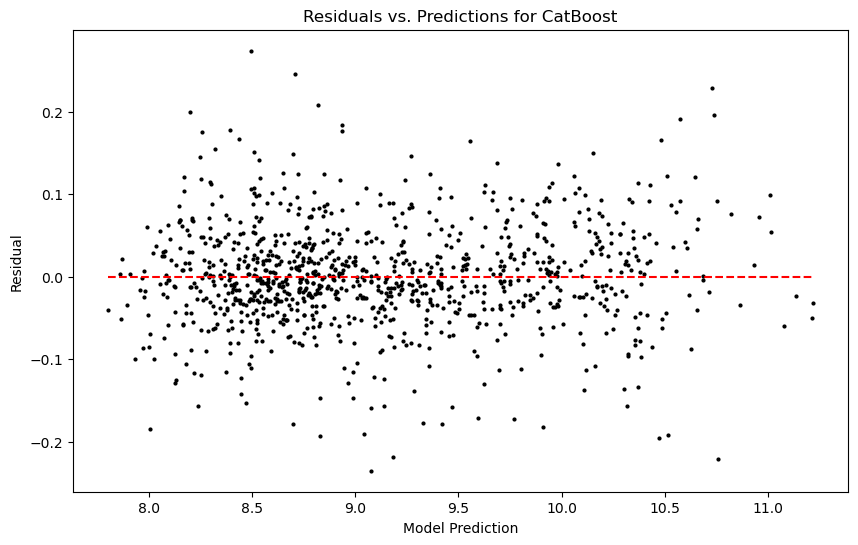

In [30]:
Y_test_array = Y_test.values.flatten()

# Compute residuals
residuals = Y_test_array - Y_pred_cb

# Plotting residuals vs. predictions for CatBoost
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred_cb, residuals, s=4, c='black')
plt.hlines(0, min(Y_pred_cb), max(Y_pred_cb), color='red', linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.title("Residuals vs. Predictions for CatBoost")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

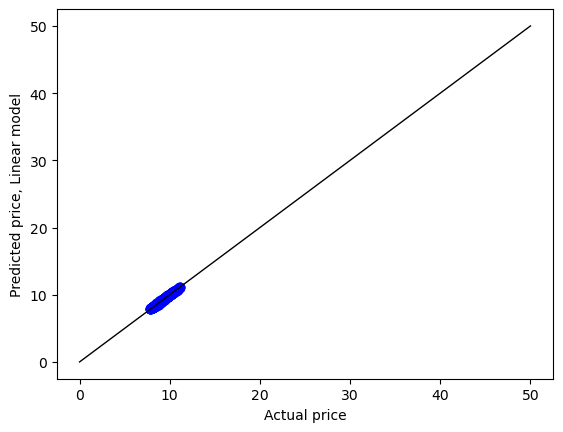

In [35]:
plt.scatter(Y_test, Y_pred_cb, color='blue') # actual vs predicted prices for the linear model
plt.ylabel('Predicted price, Linear model') # vertical axis title
plt.xlabel('Actual price') # horizontal axis title
plt.plot([0, 50], [0, 50], color='black', lw=1) # 45-degree line (at which error = 0)

plt.show